<a href="https://colab.research.google.com/github/KudoKhang/Signs-Road-Classification/blob/main/signs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
cd "/content/drive/MyDrive/ColabNotebooks/Traffic Signs Classification"

/content/drive/MyDrive/ColabNotebooks/Traffic Signs Classification


In [ ]:
pwd

'/content/drive/MyDrive/ColabNotebooks/Traffic Signs Classification'

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=e410abff96a15ae84e88976980dd26e70f8470b084a087a3ef8a315c82de8fe9
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
wget.download("https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip")

'traffic-signs-data.zip'

In [ ]:
data = "./"
!unzip -q "traffic-signs-data.zip" -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./train.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./valid.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
# link data trong folder
train_link = data + "train.p"
test_link = data + "test.p"
valid_link = data + "valid.p"

In [ ]:
# doc file .p
with open(train_link, mode="rb") as f:
  train = pickle.load(f)
with open(test_link, mode="rb") as f:
  test = pickle.load(f)
with open(train_link, mode="rb") as f:
  valid = pickle.load(f)    

In [ ]:
train

In [ ]:
trainX = train['features']
trainY = train['labels']

validX = valid['features']
validY = valid['labels']

testX = test['features']
testY = test['labels']

In [ ]:
trainX.shape

(34799, 32, 32, 3)

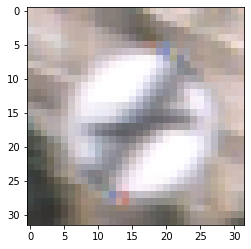

In [ ]:
plt.imshow(trainX[50])

In [ ]:
classNames = {0: 'Giới hạn tốc độ (20km / h)',
 1: 'Giới hạn tốc độ (30km / h)',
 2: 'Giới hạn tốc độ (50km / h)',
 3: 'Giới hạn tốc độ (60km / h)',
 4: 'Giới hạn tốc độ (70km / h)',
 5: 'Giới hạn tốc độ (80km / h)',
 6: 'Hết tốc độ giới hạn (80km / h)',
 7: 'Giới hạn tốc độ (100km / h)',
 8: 'Giới hạn tốc độ (120km / h)',
 9: 'Không vượt qua',
 10: 'Cấm xe trên 3,5 tấn đi qua',
 11: 'Quyền ưu tiên tại giao lộ tiếp theo',
 12: 'Đường ưu tiên',
 13: 'Năng suất',
 14: 'Dừng lại',
 15: 'Không có xe cộ',
 16: 'Cấm xe trên 3,5 tấn',
 17: 'Không vào',
 18: 'Thận trọng chung',
 19: 'Đường cong nguy hiểm bên trái',
 20: 'Đường cong nguy hiểm bên phải',
 21: 'Đường cong kép',
 22: 'Con đường gập ghềnh',
 23: 'Đường trơn trượt',
 24: 'Đường thu hẹp bên phải',
 25: 'Làm đường',
 26: 'Tín hiệu giao thông',
 27: 'Người đi bộ',
 28: 'Trẻ em băng qua đường',
 29: 'Xe đạp băng qua đường',
 30: 'Cẩn thận với băng / tuyết',
 31: 'Động vật hoang dã băng qua',
 32: 'Kết thúc mọi giới hạn tốc độ và vượt qua',
 33: 'Rẽ phải về phía trước',
 34: 'Rẽ trái phía trước',
 35: 'Chỉ phía trước',
 36: 'Đi thẳng hoặc sang phải',
 37: 'Đi thẳng hoặc sang trái',
 38: 'Đi bên phải',
 39: 'Đi bên trái',
 40: 'Bắt ​​buộc đi đường vòng',
 41: 'Kết thúc không có vượt qua',
 42: 'Cấm xe trên 3,5 tấn đi qua'}

In [ ]:
classNames[trainY[50]]

'Kết thúc không có vượt qua'

In [ ]:
classNames[trainY[50]]

'Kết thúc không có vượt qua'

In [ ]:
# Xao tron data, vì data ban dau xep theo thu tu -> model se bam sat training set -> mo hinh khong co tinh tong quat (generalization) -> Overfitting
trainX, trainY = shuffle(trainX, trainY)

In [ ]:
classNames[trainY[50]]

'Làm đường'

In [ ]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [ ]:
trainX

In [ ]:
# Chuan hoa one hot.
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [ ]:
valid["labels"][0]

41

In [ ]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()
width, height, classes = 32, 32, 43
shape = (width, height, 3)

In [ ]:
shape

(32, 32, 3)

In [ ]:
model.add(Conv2D(32, (3,3), padding="same", input_shape=shape))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3,3), padding="same"))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, (3,3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3,3), padding="same"))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation('softmax'))

In [ ]:
trainX.shape[0]//64

543

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)


In [ ]:
learning_rate = 0.01


In [ ]:
epochs = 10
batch_size = 64


In [ ]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)


In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print("Start Training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)